In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
%cd /content/drive/MyDrive/Image Analysis/Ex_1X

/content/drive/MyDrive/Image Analysis/Ex_1X


Download the input images

In [4]:
input_img1 = cv2.imread("img/immed_gray_inv_20051218_thresh127.pgm", cv2.IMREAD_GRAYSCALE)

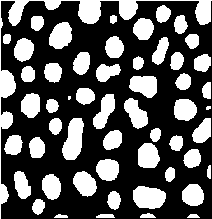

In [5]:
cv2_imshow(input_img1)

In [6]:
input_img1.shape

(219, 212)

In [7]:
input_img2 = cv2.imread("img/immed_gray_inv.pgm", cv2.IMREAD_GRAYSCALE)

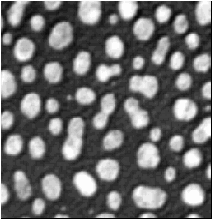

In [8]:
cv2_imshow(input_img2)

In [9]:
input_img2.shape

(219, 212)

In [10]:
CONN1 = 8
CONN2 = 8

perform the fletzone algorithm

In [11]:
LABEL_NO_FZ = 0

In [12]:
def setImageValue(img, LABEL_NO_FZ):
  return np.full((img.shape[0],img.shape[1]), LABEL_NO_FZ)

In [13]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [14]:
def GetNeighbors(x, y, inp_img, CONN):

  nrows = inp_img.shape[0]
  ncols = inp_img.shape[1]

  row_fil = calculateRange(1, x, nrows)
  col_fil = calculateRange(1, y, ncols)

  neighbors = []

  if CONN == 4:
    #we are in 4-connectivity
    for row in row_fil:
      if row != 0:
        neighbors.append((x+row, y))

    for col in col_fil:
      if col != 0:
        neighbors.append((x, y+col))

  else:
    #we are in 8 connectivity
    for row in row_fil:
      for col in col_fil:
        if not(row == 0 and col == 0):
          neighbors.append((x+row, y+col))

  return neighbors

In [15]:
def Insert(flatzone, x, y):
  flatzone.append((x, y))
  return flatzone

In [16]:
def Extract(flatzone):
  return flatzone.pop()

In [18]:
def checkNeighbors(r, c, neighbors, input_img, out_img, LABEL_FZ, flatzone):
  for i in range(len(neighbors)):

    rr, cc = neighbors[i]
      
    p1 = input_img[r][c]
    p2 = input_img[rr][cc]

    if ((p1 == p2) and (out_img[rr][cc] != LABEL_FZ)):

      out_img[rr][cc] = LABEL_FZ
      flatzone = Insert(flatzone, rr, cc)

  return out_img, flatzone

In [19]:
def ReconstructFlatZone(input_img, x, y, LABEL_FZ, CONN, out_img):

  #set the value of x pixel in output as flatzone label
  out_img[x][y] = LABEL_FZ

  #creation of the flatzone queue
  flatzone = []

  #flatzone = Insert(flatzone, x, y, inp_img)
  flatzone = Insert(flatzone, x, y)

  while(len(flatzone) > 0):

    r, c = Extract(flatzone)

    neighbors = GetNeighbors(r, c, input_img, CONN)

    out_img, flatzone = checkNeighbors(r, c, neighbors, input_img, out_img, LABEL_FZ, flatzone)

  return out_img



In [33]:
#initialize the output
out1 = setImageValue(input_img1, LABEL_NO_FZ)
count = 0

for r in range(input_img1.shape[0]):
  for c in range(input_img1.shape[1]):

    pixel = input_img1[r][c]

    if pixel != 0 and out1[r][c] == LABEL_NO_FZ:
      count += 1
      LABEL_FZ1 = pixel
      out1 = ReconstructFlatZone(input_img1,r,c,LABEL_FZ1, CONN1, out1)

count += 1

print('The total number of flatzone is:', count)

The total number of flatzone is: 55


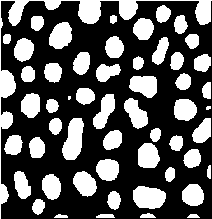

In [22]:
cv2_imshow(out1)

In [35]:
#initialize the output
out2 = setImageValue(input_img2, LABEL_NO_FZ)
count = 0

for r in range(input_img2.shape[0]):
  for c in range(input_img2.shape[1]):

    pixel = input_img2[r][c]

    if pixel != 0 and out2[r][c] == LABEL_NO_FZ:
      count += 1
      LABEL_FZ2 = pixel
      out2 = ReconstructFlatZone(input_img2,r,c,LABEL_FZ2, CONN2, out2)

count += 1

print('The total number of flatzone is:', count)

The total number of flatzone is: 12488


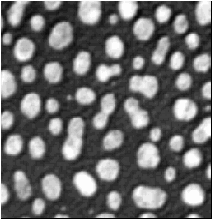

In [32]:
cv2_imshow(out2)